<a href="https://colab.research.google.com/github/margazadasha/Computer-data-vizualization-systems/blob/main/%D0%9A%D0%A1%D0%92%D0%94_%D0%9B%D0%A0_3_%D0%9C%D0%B0%D1%80%D0%B3%D0%B0%D0%B7%D0%B0_4_6_%D0%A4%D0%86%D0%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторна робота №2**

**Тема:** Побудова логістичної регресії для датасету Cure The Princess

**Завдання.** Побудувати логістичну регресію для датасета data.csv

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [10]:
from google.colab import files
import pandas as pd

# Завантаження файлу
uploaded = files.upload()

Saving data.csv to data (1).csv


In [11]:
df = pd.read_csv('data.csv')
df

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,9.4,2.2,15.8,5.9,29.7,18.7,11.5,13.1,15.3,22.5,10.1,4.7,13.8,0
2334,12.1,7.6,20.6,5.3,18.9,19.1,9.4,11.9,21.8,12.0,26.7,8.4,24.4,1
2335,15.2,33.2,7.2,14.5,16.0,16.7,1.2,32.5,34.5,25.9,3.9,18.0,19.2,1
2336,2.0,17.0,33.2,13.2,29.1,35.5,19.7,30.3,30.7,4.3,15.7,20.5,2.1,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phoenix Feather  2338 non-null   float64
 1   Unicorn Horn     2338 non-null   float64
 2   Dragon's Blood   2338 non-null   float64
 3   Mermaid Tears    2338 non-null   float64
 4   Fairy Dust       2338 non-null   float64
 5   Goblin Toes      2338 non-null   float64
 6   Witch's Brew     2338 non-null   float64
 7   Griffin Claw     2338 non-null   float64
 8   Troll Hair       2338 non-null   float64
 9   Kraken Ink       2338 non-null   float64
 10  Minotaur Horn    2338 non-null   float64
 11  Basilisk Scale   2338 non-null   float64
 12  Chimera Fang     2338 non-null   float64
 13  Cured            2338 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 255.8 KB


In [13]:
df.isnull().sum()

,0
Phoenix Feather,0
Unicorn Horn,0
Dragon's Blood,0
Mermaid Tears,0
Fairy Dust,0
Goblin Toes,0
Witch's Brew,0
Griffin Claw,0
Troll Hair,0
Kraken Ink,0


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,15.365697,10.946749,16.115654,13.627973,15.069504,14.157271,12.328914,14.911206,16.871685,14.890590,10.916125,15.371600,12.084003,0.496578
std,8.669969,7.225162,8.372518,7.545244,8.349340,7.831476,7.709753,8.132678,9.579027,8.014197,7.045195,8.559139,8.047540,0.500095
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.500000,5.300000,9.600000,7.600000,8.625000,7.900000,6.325000,8.400000,8.900000,8.800000,5.200000,8.800000,5.600000,0.000000
50%,14.700000,9.500000,15.800000,13.100000,14.500000,13.500000,11.200000,14.400000,16.300000,14.400000,9.700000,14.800000,10.500000,0.000000
75%,21.300000,15.575000,22.000000,19.000000,20.700000,19.500000,16.900000,20.500000,24.000000,20.400000,15.375000,21.100000,17.275000,1.000000
max,42.100000,34.100000,40.800000,35.800000,40.400000,37.800000,37.300000,39.400000,44.800000,39.500000,33.700000,42.000000,37.800000,1.000000


In [16]:
df['Cured'].value_counts()

,count
Cured,
0,1177
1,1161


In [18]:
# Визначення категоріальних та числових ознак
cat_features = [col for col in df if df[col].nunique() < 25]
cont_features = [col for col in df if df[col].nunique() >= 25]

# Виведення результатів
print(f'Number of categorical features: {len(cat_features)}')
print('Categorical features:', cat_features, '\n')

print(f'Number of continuous features: {len(cont_features)}')
print('Continuous features:', cont_features, '\n')

Number of categorical features: 1
Categorical features: ['Cured'] 

Number of continuous features: 13
Continuous features: ['Phoenix Feather', 'Unicorn Horn', "Dragon's Blood", 'Mermaid Tears', 'Fairy Dust', 'Goblin Toes', "Witch's Brew", 'Griffin Claw', 'Troll Hair', 'Kraken Ink', 'Minotaur Horn', 'Basilisk Scale', 'Chimera Fang'] 



In [19]:
correlation_matrix = df.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
Phoenix Feather,1.000000,-0.024394,-0.023557,-0.259106,-0.208022,-0.018191,-0.142387,-0.161637,0.321173,-0.224160,-0.023219,-0.025965,0.009238,0.015931
Unicorn Horn,-0.024394,1.000000,-0.002469,0.010474,0.014145,0.019987,0.005455,0.033068,0.007860,0.024936,0.014715,-0.008806,-0.021116,-0.008239
Dragon's Blood,-0.023557,-0.002469,1.000000,0.029384,0.086929,-0.092252,0.152263,-0.059091,-0.043182,0.056685,-0.009658,0.322778,-0.004350,-0.007662
Mermaid Tears,-0.259106,0.010474,0.029384,1.000000,-0.036810,-0.262034,0.344852,-0.008431,0.153077,0.490274,-0.028583,0.008684,-0.008123,0.009619
Fairy Dust,-0.208022,0.014145,0.086929,-0.036810,1.000000,0.066415,0.235050,0.337793,0.043373,0.015638,0.023528,0.095666,-0.011109,0.015004
Goblin Toes,-0.018191,0.019987,-0.092252,-0.262034,0.066415,1.000000,-0.163425,0.051195,0.221062,-0.251362,0.011820,-0.150230,-0.008232,0.046314
Witch's Brew,-0.142387,0.005455,0.152263,0.344852,0.235050,-0.163425,1.000000,-0.054118,-0.172526,0.170546,-0.003197,0.222624,-0.009290,0.245993
Griffin Claw,-0.161637,0.033068,-0.059091,-0.008431,0.337793,0.051195,-0.054118,1.000000,0.027322,-0.114718,0.013836,0.122214,0.015607,0.001019
Troll Hair,0.321173,0.007860,-0.043182,0.153077,0.043373,0.221062,-0.172526,0.027322,1.000000,0.009524,-0.012391,-0.031713,0.026299,0.498165
Kraken Ink,-0.224160,0.024936,0.056685,0.490274,0.015638,-0.251362,0.170546,-0.114718,0.009524,1.000000,-0.016423,-0.223911,-0.034703,-0.022845


In [24]:
cured_correlation = correlation_matrix['Cured'].sort_values(ascending=False)
cured_correlation

,Cured
Cured,1.000000
Troll Hair,0.498165
Witch's Brew,0.245993
Goblin Toes,0.046314
Chimera Fang,0.022144
Phoenix Feather,0.015931
Fairy Dust,0.015004
Minotaur Horn,0.011329
Mermaid Tears,0.009619
Griffin Claw,0.001019


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import TargetEncoder, StandardScaler, LabelEncoder

import torch
import torch.nn as nn
import torch.optim as optim

import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [26]:
X = df.drop('Cured', axis=1).values
y = df['Cured'].values

In [27]:
from sklearn.preprocessing import StandardScaler
# Масштабування
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33, stratify=y)

In [29]:
# Конвертація numpy рядків у PyTorch тензори
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Додати вимір для сумісності з BCELoss

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)  # Додати вимір для сумісності з BCELoss

In [31]:
# Демонстрація лінійного шару
m = nn.Linear(13, 1)  # Лінійний шар з 13-ма входами та 1-м виходом
input = torch.randn(4, 13)  # Випадковий вхідний тензор розміром (4, 13)
output = m(input)  # Обчислення виходу

print('Input:', input, f'shape {input.shape}', sep='\n')
print('\nOutput:', output, f'shape {output.shape}', sep='\n')

Input:
tensor([[ 4.9156e-01, -8.3700e-01,  7.9708e-01,  1.6396e+00, -8.3465e-01,
          9.6747e-01,  2.7914e-01,  1.4679e+00, -6.5322e-01, -7.5034e-01,
          1.0762e+00, -2.2841e+00,  3.4906e-01],
        [ 1.8578e+00, -1.8173e-01,  8.9291e-01, -9.4893e-01, -9.3821e-01,
         -1.4993e+00,  1.7523e-01,  2.1072e-01,  1.6188e+00, -1.1586e-01,
         -1.6617e+00,  2.4077e+00, -1.8957e+00],
        [ 2.6878e-01,  9.5420e-01,  6.8047e-01,  2.4506e+00, -2.0797e+00,
          2.7410e+00, -2.5823e-01, -5.1156e-01,  2.4675e-01,  7.1490e-01,
         -2.1990e+00,  1.8780e+00,  1.5818e+00],
        [-1.0522e+00,  5.3652e-01,  1.5168e+00, -7.5879e-01,  3.6338e-01,
         -1.3942e+00, -1.6716e-03, -5.3750e-01,  8.0243e-01,  6.8265e-01,
          6.9439e-01,  9.9587e-02, -1.3811e-01]])
shape torch.Size([4, 13])

Output:
tensor([[0.3529],
        [0.6719],
        [0.4234],
        [0.0318]], grad_fn=<AddmmBackward0>)
shape torch.Size([4, 1])


In [32]:
# Визначення моделі логістичної регресії

class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

In [33]:
# Ініціація моделі
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)

# Визначення функції втрати та оптимізатора
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [34]:
model.parameters

<bound method Module.parameters of LogisticRegression(
  (linear): Linear(in_features=13, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)>

In [35]:
# Навчання моделі
num_epochs = 500
for epoch in range(num_epochs):
    # Прямий прохід
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Зворотний прохід і оптимізація
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [5/500], Loss: 0.6280
Epoch [10/500], Loss: 0.6250
Epoch [15/500], Loss: 0.6220
Epoch [20/500], Loss: 0.6191
Epoch [25/500], Loss: 0.6162
Epoch [30/500], Loss: 0.6134
Epoch [35/500], Loss: 0.6106
Epoch [40/500], Loss: 0.6079
Epoch [45/500], Loss: 0.6053
Epoch [50/500], Loss: 0.6027
Epoch [55/500], Loss: 0.6002
Epoch [60/500], Loss: 0.5977
Epoch [65/500], Loss: 0.5952
Epoch [70/500], Loss: 0.5928
Epoch [75/500], Loss: 0.5905
Epoch [80/500], Loss: 0.5882
Epoch [85/500], Loss: 0.5859
Epoch [90/500], Loss: 0.5837
Epoch [95/500], Loss: 0.5815
Epoch [100/500], Loss: 0.5794
Epoch [105/500], Loss: 0.5773
Epoch [110/500], Loss: 0.5752
Epoch [115/500], Loss: 0.5732
Epoch [120/500], Loss: 0.5712
Epoch [125/500], Loss: 0.5693
Epoch [130/500], Loss: 0.5674
Epoch [135/500], Loss: 0.5655
Epoch [140/500], Loss: 0.5636
Epoch [145/500], Loss: 0.5618
Epoch [150/500], Loss: 0.5600
Epoch [155/500], Loss: 0.5583
Epoch [160/500], Loss: 0.5566
Epoch [165/500], Loss: 0.5549
Epoch [170/500], Loss: 0.5532


In [36]:
# Тестування моделі та виведення точності
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy()
    y_pred = (y_pred > 0.5).astype(int)  # Використання порогу 0.5
    accuracy = accuracy_score(y_test.numpy(), y_pred)
    print('Accuracy:', accuracy)

Accuracy: 0.8005181347150259


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
X = df.drop('Cured', axis=1)
y = df['Cured']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 89.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       231
           1       0.90      0.89      0.89       237

    accuracy                           0.89       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.89      0.89      0.89       468



In [40]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[207,  24],
       [ 26, 211]])

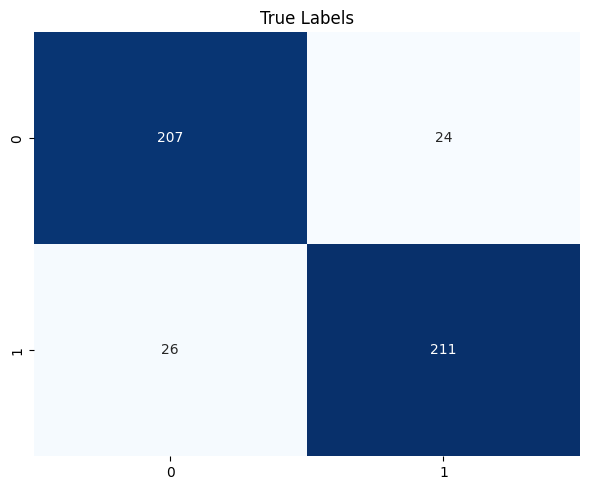

In [41]:
plt.figure(figsize=(6,5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)

plt.title("Confusion Matrix")
plt.title('Predicted Labels')
plt.title('True Labels')

plt.tight_layout()
plt.show()

**Висновок:** У результаті виконання лабораторної роботи з побудови логістичної регресії для задачі бінарної класифікації на основі датасету Cure The Princess, було успішно реалізовано модель за допомогою бібліотеки PyTorch.

Під час роботи були виконані наступні етапи:

1.   Завантаження та попередня обробка даних, зокрема нормалізація та поділ на тренувальну та тестову вибірки.
2.   Створення моделі логістичної регресії, що включала визначення коефіцієнтів та функції активації.
3.   Вибір функції втрат та оптимізатора SGD для навчання моделі.
4.   Навчання моделі на тренувальних даних та оцінка її точності на тестових даних.

Результати показали, що побудована модель здатна досягти гідних результатів у задачі бінарної класифікації, хоча для поліпшення точності можна застосувати додаткові методи, такі як регуляризація або оптимізація гіперпараметрів.

Загалом, використання PyTorch дозволило ефективно реалізувати і тренувати модель, що продемонструвало основні принципи роботи з нейронними мережами та логістичною регресією в контексті бінарної класифікації.